In [5]:
!pip install prophet


In [6]:
# To stop  displaying warning messages in output
import warnings
warnings.filterwarnings('ignore')
# To  collect garbage (delete files)
import gc
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# for basic math operations like sqrt
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium

from datetime import datetime
import time
import seaborn as sns
import os
import xgboost as xgb
import matplotlib
matplotlib.use('nbagg')
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.cluster import MiniBatchKMeans, KMeans
import warnings
warnings.simplefilter('ignore')
from math import sin, cos, sqrt, atan2, radians

In [7]:
%matplotlib inline

In [ ]:
input_data = pd.read_csv("/content/ct_rr.csv")
input_data.shape

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
input_datas = pd.read_csv("/content/ct_rr.csv")

# Select the first 100,000 rows and the first 6 columns
input_data = input_data.iloc[:100000, :6]

# Write the selected data to a new CSV file
input_data.to_csv("/content/selected_data.csv", index=False)
input_data.shape


In [10]:
print("Data size before removing: ",input_data.shape)

# Check duplicated rows in train set
df = input_data[input_data.duplicated()]  # checks duplicate rows considering all columns
print("Number of duplicate observations: ", len(df))
del df
gc.collect();

#Dropping duplicates and keeping first occurence only
input_data.drop_duplicates(keep = 'first', inplace = True)

print("Data size after removing: ",input_data.shape)

Data size before removing:  (61690, 6)
Number of duplicate observations:  381
Data size after removing:  (61309, 6)


In [11]:
input_data.head()

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng
0,2018-04-07 07:07:17,14626,12.313621,76.658195,12.287301,76.602280
1,2018-04-07 07:32:27,85490,12.943947,77.560745,12.954014,77.543770
2,2018-04-07 07:36:44,05408,12.899603,77.587300,12.934780,77.569950
3,2018-04-07 07:38:00,58940,12.918229,77.607544,12.968971,77.636375
4,2018-04-07 07:39:29,05408,12.899490,77.587270,12.934780,77.569950


In [12]:
print("Number of unique customers: " ,input_data["number"].nunique())

Number of unique customers:  10804


In [13]:
new = input_data["ts"].str.split(" ", n = 1, expand = True)

# making separate first name column from new data frame
input_data["raw_date"]= new[0]

# making separate last name column from new data frame
input_data["raw_time"]= new[1]

input_data.head()

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,raw_date,raw_time
0,2018-04-07 07:07:17,14626,12.313621,76.658195,12.287301,76.602280,2018-04-07,07:07:17
1,2018-04-07 07:32:27,85490,12.943947,77.560745,12.954014,77.543770,2018-04-07,07:32:27
2,2018-04-07 07:36:44,05408,12.899603,77.587300,12.934780,77.569950,2018-04-07,07:36:44
3,2018-04-07 07:38:00,58940,12.918229,77.607544,12.968971,77.636375,2018-04-07,07:38:00
4,2018-04-07 07:39:29,05408,12.899490,77.587270,12.934780,77.569950,2018-04-07,07:39:29


In [14]:
# new data frame with split value columns
new = input_data["raw_date"].str.split("-", n = 2, expand = True)

# making separate first name column from new data frame
input_data["year"]= new[0]

# making separate last name column from new data frame
input_data["month"]= new[1]

# making separate last name column from new data frame
input_data["date"]= new[2]

input_data.head()

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,raw_date,raw_time,year,month,date
0,2018-04-07 07:07:17,14626,12.313621,76.658195,12.287301,76.602280,2018-04-07,07:07:17,2018,04,07
1,2018-04-07 07:32:27,85490,12.943947,77.560745,12.954014,77.543770,2018-04-07,07:32:27,2018,04,07
2,2018-04-07 07:36:44,05408,12.899603,77.587300,12.934780,77.569950,2018-04-07,07:36:44,2018,04,07
3,2018-04-07 07:38:00,58940,12.918229,77.607544,12.968971,77.636375,2018-04-07,07:38:00,2018,04,07
4,2018-04-07 07:39:29,05408,12.899490,77.587270,12.934780,77.569950,2018-04-07,07:39:29,2018,04,07


In [15]:
# new data frame with split value columns
new = input_data["raw_time"].str.split(":", n = 2, expand = True)

# making separate first name column from new data frame
input_data["hour"]= new[0]
#24:00 time system

# making separate last name column from new data frame
input_data["minute"]= new[1]

input_data.head()

,ts,number,pick_lat,pick_lng,drop_lat,drop_lng,raw_date,raw_time,year,month,date,hour,minute
0,2018-04-07 07:07:17,14626,12.313621,76.658195,12.287301,76.602280,2018-04-07,07:07:17,2018,04,07,07,07
1,2018-04-07 07:32:27,85490,12.943947,77.560745,12.954014,77.543770,2018-04-07,07:32:27,2018,04,07,07,32
2,2018-04-07 07:36:44,05408,12.899603,77.587300,12.934780,77.569950,2018-04-07,07:36:44,2018,04,07,07,36
3,2018-04-07 07:38:00,58940,12.918229,77.607544,12.968971,77.636375,2018-04-07,07:38:00,2018,04,07,07,38
4,2018-04-07 07:39:29,05408,12.899490,77.587270,12.934780,77.569950,2018-04-07,07:39:29,2018,04,07,07,39


In [16]:
data = input_data.copy()
data.drop(["raw_date","raw_time","number","minute"],axis=1, inplace=True)
data.head()

del input_data
gc.collect();

In [17]:
print("Is there any missing value? ",data.isna().sum().sum()>0)
data.fillna(method='ffill', inplace=True)  # Example: forward fill (this can be adjusted as needed)

# Re-check for missing values
print("Is there any missing value after handling? ", data.isna().sum().sum() > 0)

Is there any missing value?  True
Is there any missing value after handling?  False


In [18]:
def distance(pick_lat, pick_lng, drop_lat, drop_lng):

    # approximate radius of earth in km
    R = 6373.0

    s_lat = pick_lat*np.pi/180.0
    s_lng = np.deg2rad(pick_lng)
    e_lat = np.deg2rad(drop_lat)
    e_lng = np.deg2rad(drop_lng)

    d = np.sin((e_lat - s_lat)/2)**2 + np.cos(s_lat)*np.cos(e_lat) * np.sin((e_lng - s_lng)/2)**2

    return round(2 * R * np.arcsin(np.sqrt(d)),1)

In [19]:
data["distance"] = data.apply(lambda x: distance(x.pick_lat, x.pick_lng, x.drop_lat, x.drop_lng), axis=1)
data.head(3)

,ts,pick_lat,pick_lng,drop_lat,drop_lng,year,month,date,hour,distance
0,2018-04-07 07:07:17,12.313621,76.658195,12.287301,76.60228,2018,04,07,07,6.7
1,2018-04-07 07:32:27,12.943947,77.560745,12.954014,77.54377,2018,04,07,07,2.2
2,2018-04-07 07:36:44,12.899603,77.587300,12.934780,77.56995,2018,04,07,07,4.3


In [20]:
#assuming avg. bike speed of 35km/hrs, we can calculate time in min.
avg_speed = 35/60 #speed in km/minutes
data["ride_minutes"] = data["distance"].apply(lambda x: round(x/avg_speed,0))

print("Maximum ride distance covered in Km: ", data.distance.max())
print("Minimum ride distance covered in Km: ", data.distance.min())
print("Maximum ride time in mins: ",data.ride_minutes.max())
print("Minimum ride time in mins: ", data.ride_minutes.min())

Maximum ride distance covered in Km:  8132.0
Minimum ride distance covered in Km:  0.0
Maximum ride time in mins:  13941.0
Minimum ride time in mins:  0.0


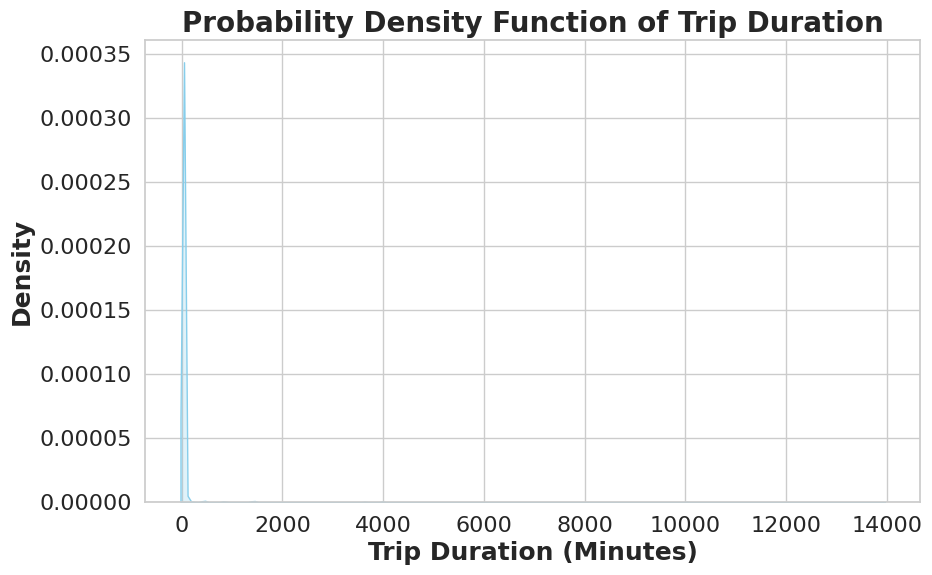

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Create the KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data["ride_minutes"].values, shade=True, cumulative=False, color="skyblue")

# Set labels and title with appropriate font sizes
plt.tick_params(labelsize=16)
plt.xlabel("Trip Duration (Minutes)", fontsize=18, fontweight='bold')
plt.ylabel("Density", fontsize=18, fontweight='bold')
plt.title("Probability Density Function of Trip Duration", fontsize=20, fontweight='bold')

# Display the plot
plt.show()

In [22]:
data = data[(data.pick_lng <90) & (data.drop_lng <90) & (data.pick_lng >66) & (data.drop_lng >66) &
       (data.pick_lat <40) & (data.drop_lat <40) & (data.pick_lat >8) & (data.drop_lat >8)]

data.shape

(61307, 11)

In [23]:
#after removing above outliers based on lat and long

print("Maximum ride distance covered in Km: ", data.distance.max())
print("Minimum ride distance covered in Km: ", data.distance.min())
print("Maximum ride time in mins: ",data.ride_minutes.max())
print("Minimum ride time in mins: ", data.ride_minutes.min())

Maximum ride distance covered in Km:  2320.9
Minimum ride distance covered in Km:  0.0
Maximum ride time in mins:  3979.0
Minimum ride time in mins:  0.0


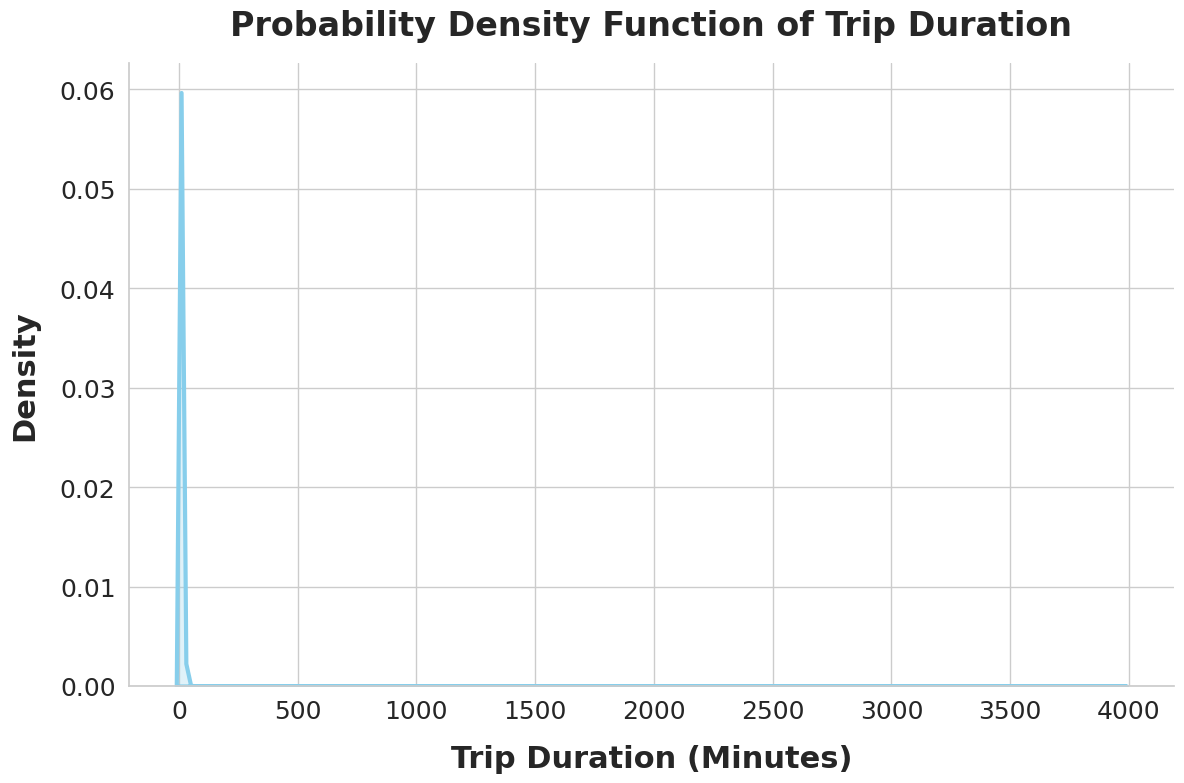

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")

# Create the KDE plot with enhanced styling
plt.figure(figsize=(12, 8))
sns.kdeplot(data["ride_minutes"].values, shade=True, cumulative=False, color="skyblue", linewidth=3)

# Set labels and title with improved font sizes and weights
plt.xlabel("Trip Duration (Minutes)", fontsize=22, fontweight='bold', labelpad=15)
plt.ylabel("Density", fontsize=22, fontweight='bold', labelpad=15)
plt.title("Probability Density Function of Trip Duration", fontsize=24, fontweight='bold', pad=20)

# Set ticks with larger font size
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Remove top and right spines
sns.despine()

# Display the plot
plt.tight_layout()
plt.show()

In [25]:
coord = data[["pick_lat", "pick_lng"]].values
regions = MiniBatchKMeans(n_clusters = 30, batch_size = 10000).fit(coord)
data["pickup_cluster"] = regions.predict(data[["pick_lat", "pick_lng"]])

In [26]:
import folium

# Function to add cluster markers with custom icon and tooltip
def add_cluster_markers(map_obj, cluster_centers):
    for center in cluster_centers:
        folium.Marker(
            location=[center[0], center[1]],
            icon=folium.Icon(color='blue', icon='info-sign'),
            popup=f"Latitude: {round(center[0], 2)}, Longitude: {round(center[1], 2)}",
            tooltip="Click for more info"
        ).add_to(map_obj)

# Initialize the map
m = folium.Map(location=[12.972442, 77.580643], tiles="Stamen Toner", zoom_start=12)

# Define cluster centers
centerOfRegions = regions.cluster_centers_

# Add cluster markers to the map
add_cluster_markers(m, centerOfRegions)

# Display the map
m

In [27]:
import folium
from sklearn.cluster import MiniBatchKMeans
import numpy as np

# Function to add cluster markers with custom icon and tooltip
def add_cluster_markers(map_obj, cluster_centers):
    for center in cluster_centers:
        folium.Marker(
            location=[center[0], center[1]],
            icon=folium.Icon(color='blue', icon='info-sign'),
            popup=f"Latitude: {round(center[0], 2)}, Longitude: {round(center[1], 2)}"
        ).add_to(map_obj)

# Get cluster centers and initialize the map
coord = data[["drop_lat", "drop_lng"]].values
regions = MiniBatchKMeans(n_clusters=30, batch_size=10000).fit(coord)
centerOfRegions = regions.cluster_centers_
m = folium.Map(location=[12.972442, 77.580643], zoom_start=12)

# Add cluster markers to the map
add_cluster_markers(m, centerOfRegions)

# Display the map
m


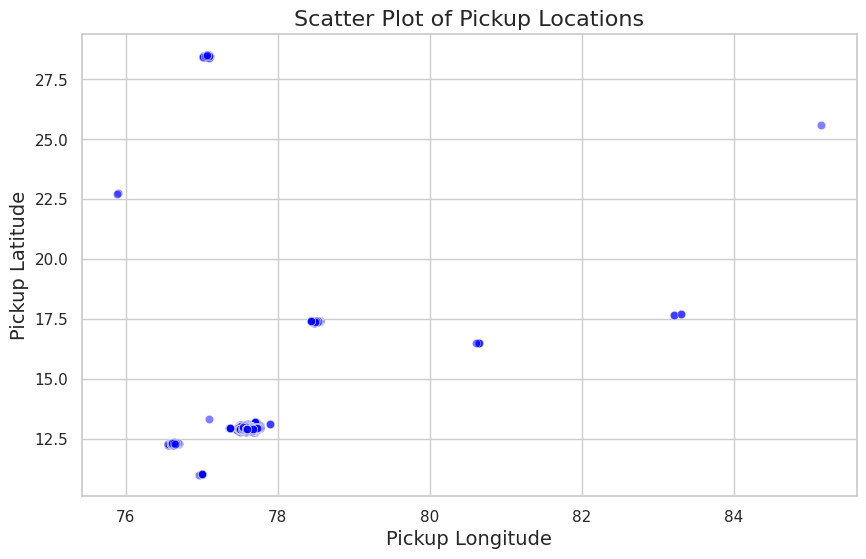

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pick_lng', y='pick_lat', data=data, color='blue', alpha=0.5)

# Set labels and title
plt.xlabel('Pickup Longitude', fontsize=14)
plt.ylabel('Pickup Latitude', fontsize=14)
plt.title('Scatter Plot of Pickup Locations', fontsize=16)

# Show plot
plt.show()

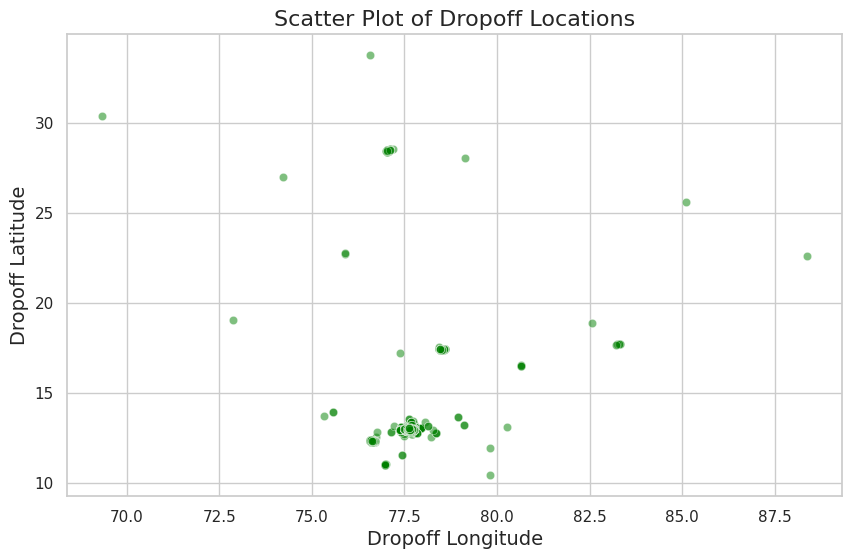

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='drop_lng', y='drop_lat', data=data, color='green', alpha=0.5)

# Set labels and title
plt.xlabel('Dropoff Longitude', fontsize=14)
plt.ylabel('Dropoff Latitude', fontsize=14)
plt.title('Scatter Plot of Dropoff Locations', fontsize=16)

# Show plot
plt.show()

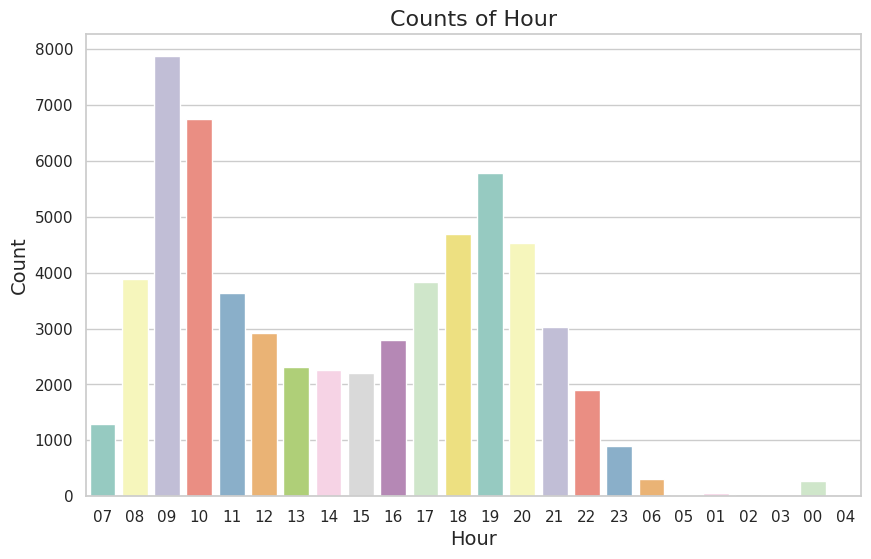

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")

# Create count plot
plt.figure(figsize=(10, 6))
sns.countplot(x="hour", data=data, palette="Set3")

# Set labels and title
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Counts of Hour', fontsize=16)

# Show plot
plt.show()

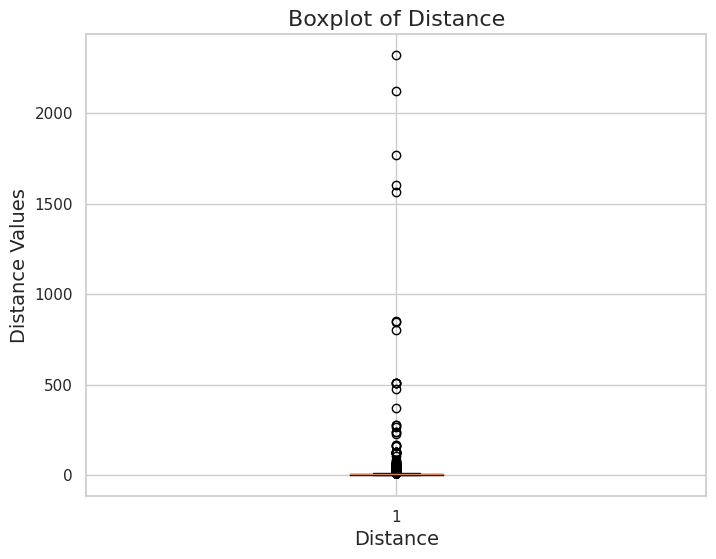

In [31]:
import matplotlib.pyplot as plt

# Create boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(data['distance'])

# Set labels and title
plt.xlabel('Distance', fontsize=14)
plt.ylabel('Distance Values', fontsize=14)
plt.title('Boxplot of Distance', fontsize=16)

# Show plot
plt.show()

Trend and Seasonality analysis

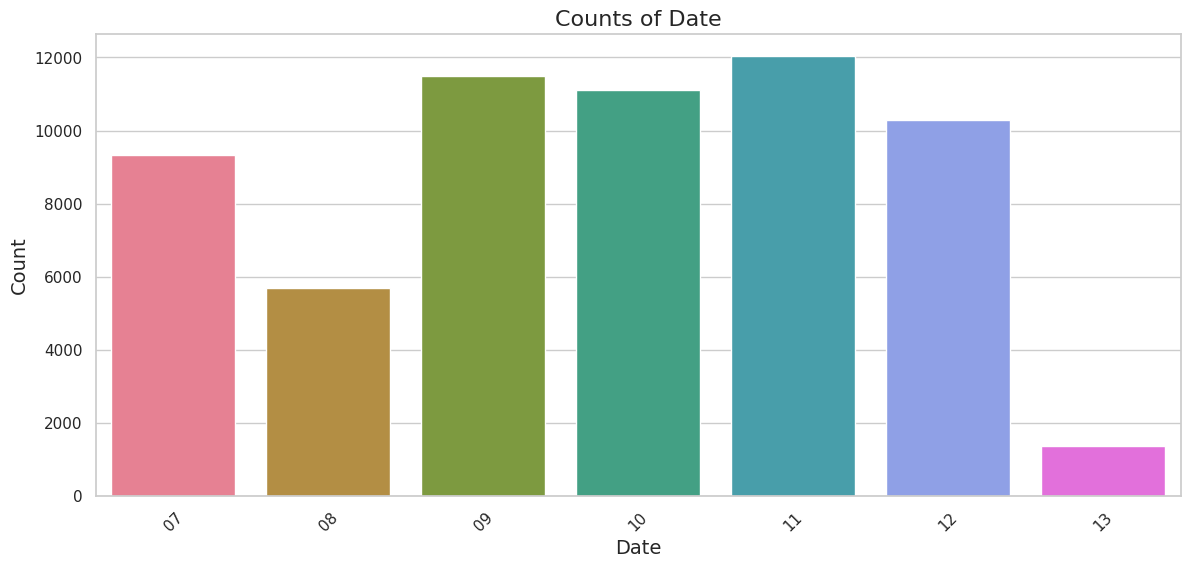

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")

# Create count plot
plt.figure(figsize=(14, 6))  # Adjust figsize as needed
sns.countplot(x="date", data=data, palette="husl")  # Adjust palette as needed

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Set labels and title
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Counts of Date', fontsize=16)

# Show plot
plt.show()


In [33]:
data.head()

,ts,pick_lat,pick_lng,drop_lat,drop_lng,year,month,date,hour,distance,ride_minutes,pickup_cluster
0,2018-04-07 07:07:17,12.313621,76.658195,12.287301,76.602280,2018,04,07,07,6.7,11.0,3
1,2018-04-07 07:32:27,12.943947,77.560745,12.954014,77.543770,2018,04,07,07,2.2,4.0,29
2,2018-04-07 07:36:44,12.899603,77.587300,12.934780,77.569950,2018,04,07,07,4.3,7.0,13
3,2018-04-07 07:38:00,12.918229,77.607544,12.968971,77.636375,2018,04,07,07,6.5,11.0,28
4,2018-04-07 07:39:29,12.899490,77.587270,12.934780,77.569950,2018,04,07,07,4.4,8.0,13


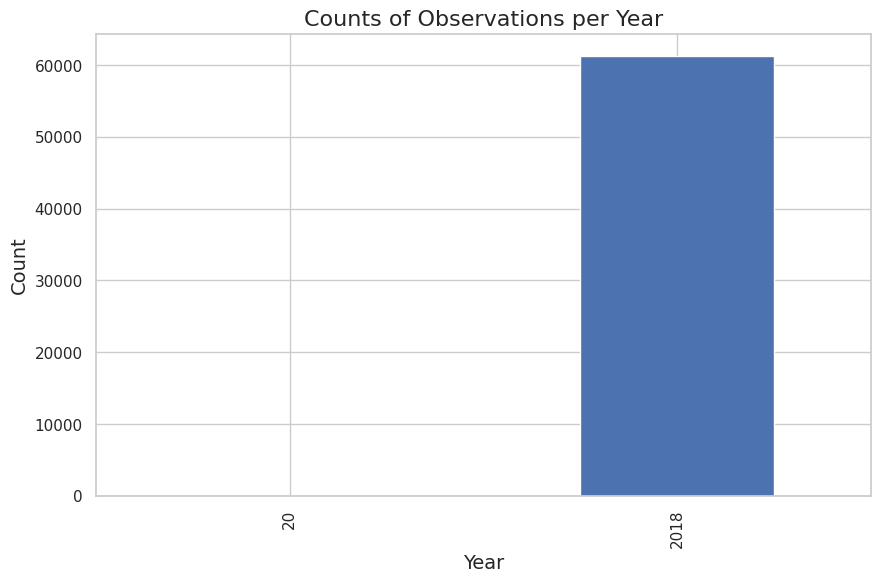

In [34]:
import matplotlib.pyplot as plt

# Count the occurrences of each year and create a bar plot
data['year'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))

# Set labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Counts of Observations per Year', fontsize=16)

# Show the plot
plt.show()

In [35]:
# Feature Engineering
def create_day_series(df):

    # Grouping by Date/Time to calculate number of trips
    day_df = pd.Series(df.groupby(['ts']).size())
    # setting Date/Time as index
    day_df.index = pd.DatetimeIndex(day_df.index)
    # Resampling to daily trips
    day_df = day_df.resample('1D').apply(np.sum)

    return day_df

day_df = create_day_series(data)
day_df.head()

ValueError: Given date string "20" not likely a datetime, at position 0

In [ ]:
day_df.shape

In [ ]:
from random import randrange
from pandas import Series
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Generate some random data for demonstration
day_df = Series([randrange(100) for i in range(365)])

# Perform seasonal decomposition
result = seasonal_decompose(day_df, model='additive', period=5)

# Plot the decomposed components with improved styling
plt.figure(figsize=(10, 8))

# Plot original time series
plt.subplot(4, 1, 1)
plt.plot(result.observed, color='blue')
plt.title('Original Time Series', fontsize=16)

# Plot trend component
plt.subplot(4, 1, 2)
plt.plot(result.trend, color='green')
plt.title('Trend Component', fontsize=16)

# Plot seasonal component
plt.subplot(4, 1, 3)
plt.plot(result.seasonal, color='red')
plt.title('Seasonal Component', fontsize=16)

# Plot residual component
plt.subplot(4, 1, 4)
plt.plot(result.resid, color='purple')
plt.title('Residual Component', fontsize=16)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


 Time Series predictions using Holt-Winters

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
train, test = day_df.iloc[0:300], day_df.iloc[300:]
model = ExponentialSmoothing(day_df, seasonal='add', seasonal_periods=7).fit()
pred = model.predict(start=test.index[0], end=test.index[-1])
plt.figure(figsize=(15,9))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')
plt.show()

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mae = mean_absolute_error(test, pred)
print('MAE: %.3f' % mae)

In [ ]:
mape = mean_absolute_percentage_error(test, pred)
print('MAPE: %.3f' % mape)

Fbprophet

In [ ]:
plt.figure(figsize=(12,8))
day_df.plot()
plt.show()

In [ ]:
# prepare expected column names
df = pd.DataFrame()
df['ds'] = day_df.index
df['y'] = day_df.values

In [ ]:
## Plot the Time series data
fig, ax = plt.subplots(figsize=(20,7))
a = sns.lineplot(x="ds", y="y", data=df)
a.set_title("Daily Ride Data",fontsize=15)
plt.show()


In [ ]:
# Install prophet
!pip install prophet

# Import the Prophet class
from prophet import Prophet

# Sample data for demonstration
data = {
    'ds': pd.date_range(start='2022-01-01', periods=365, freq='D'),
    'y': np.random.rand(365) * 100
}
df = pd.DataFrame(data)

# Step 1: Check the format of the date column and convert it if necessary
# Assuming your date column is named 'ds'
df['ds'] = pd.to_datetime(df['ds'])  # Convert to datetime if not already in datetime format

# Step 2: Check the range of date values and ensure they are valid

# Define the model
model = Prophet()

# Fit the model
model.fit(df)

# Create future dataframe
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.show()


Manually Evaluate Forecast Model

In [ ]:
# create test dataset, remove last 60 days
train = df.drop(df.index[:-60])
print(train.tail())

In [ ]:
train.shape

In [ ]:
train['ds'] = pd.to_datetime(train['ds'])

In [ ]:
forecast = model.predict(train)

In [ ]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

In [ ]:
# plot forecast
model.plot(forecast)
plt.legend(loc='best')
plt.show()

In [ ]:
# Plot the components of the model
fig = model.plot_components(forecast)

In [ ]:
forecast.shape

In [ ]:
# calculate MAE between expected and predicted values for december
y_true = df['y'][-60:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

In [ ]:
mape = mean_absolute_percentage_error(y_true, y_pred)
print('MAPE: %.3f' % mape)

In [ ]:
# plot expected vs actual
%matplotlib inline
plt.figure(figsize=(12,8))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()